In [215]:
#Importing backend from keras and looking for available gpus
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [216]:
#Importing data from keras datasets
from tensorflow.keras.datasets import cifar10, mnist
#Splitting the dataset into train and test dataset
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
print('x_train_full shape: {}, y_train_full.shape: {}'
      .format(x_train_full.shape, y_train_full.shape))
print('x_test shape: {}, y_test.shape: {}'.format(x_test.shape, y_test.shape))

x_train_full shape: (50000, 32, 32, 3), y_train_full.shape: (50000, 1)
x_test shape: (10000, 32, 32, 3), y_test.shape: (10000, 1)


In [217]:
#Once data is loaded , we perform reshaping of the dataset
y_train_full = y_train_full.reshape(y_train_full.shape[0],)
y_test = y_test.reshape(y_test.shape[0],)
print('y_train_full shape: {}, y_test shape: {}'
      .format(y_train_full.shape, y_test.shape))

y_train_full shape: (50000,), y_test shape: (10000,)


In [218]:
#From sklearn we are using model selecttion to import train_test_split
from sklearn.model_selection import train_test_split
#Further splitting training dataset to training and validation set
split = 0.2
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)
#Getting the dimension of training and validation set
print('x_train: {}, y_train: {}, x_val: {}, y_val: {}'
      .format(x_train.shape, y_train.shape, x_val.shape, y_val.shape))
#num_classes = len(np.unique(y_train))
#num_classes

x_train: (40000, 32, 32, 3), y_train: (40000,), x_val: (10000, 32, 32, 3), y_val: (10000,)


In [0]:
# pick 25 random images and plotting it further
import numpy as np
idxs = np.random.randint(x_train.shape[0], size=25)
images = x_train[idxs]
labels = y_train[idxs]
classnames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

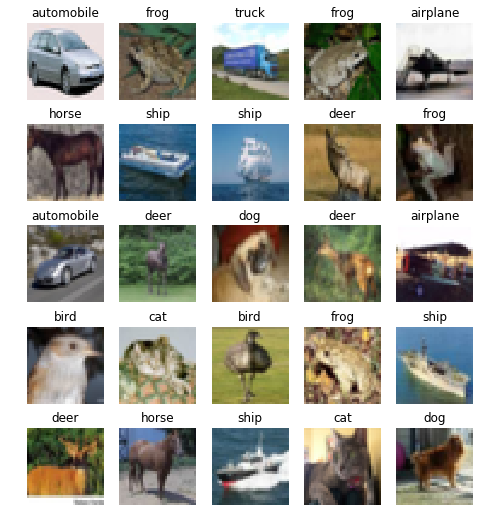

In [221]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(5,5, figsize=(8,9))
for i, ax in enumerate(axes.flat):
  ax.imshow(images[i])
  ax.axis('off')
  idx = labels[i]
  ax.set_title(classnames[idx])
  
plt.show()

# **Data Preprocessing**

In [0]:

#x_train = x_train.astype('float32')/255
#x_test = x_test.astype('float32')/255
#x_val = x_val.astype('float32')/255
# convert class labels to binary class labels
#y_train = np_utils.to_categorical(y_train, num_classes)
#y_test = np_utils.to_categorical(y_test, num_classes)
#y_val = np_utils.to_categorical(y_val, num_classes)

In [0]:
#Working on batch size
def train_gen(batch_size):
  while True:
    offset = np.random.randint(0, x_train.shape[0] - batch_size)
    yield x_train[offset:offset+batch_size], y_train[offset:offset + batch_size]

In [223]:
#Various convulation layer,pooling and batch normalization is done
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
#Flatten the output and later on passing it to single dense layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Activation('softmax'))
#Generating Summary
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_33 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
batch_normalization_34 (Batc (None, 10, 10, 64)        256       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 3, 3, 128)       

In [0]:
#Configuring the model for training data set
model.compile(
    optimizer=tf.train.AdamOptimizer(learning_rate=1e-3, ),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['sparse_categorical_accuracy']
)

In [225]:
from time import time
batch_size=128
start = time()
history = model.fit_generator(
    train_gen(batch_size), epochs=25, 
    steps_per_epoch=np.ceil(x_train.shape[0]/batch_size),
    validation_data = (x_val, y_val),
)
end = time()

Epoch 1/25
313/313 [==============================] - 9s 28ms/step - loss: 1.5252 - sparse_categorical_accuracy: 0.4615 - val_loss: 1.3220 - val_sparse_categorical_accuracy: 0.5322
Epoch 2/25
313/313 [==============================] - 6s 20ms/step - loss: 1.0337 - sparse_categorical_accuracy: 0.6373 - val_loss: 1.0870 - val_sparse_categorical_accuracy: 0.6183
Epoch 3/25
313/313 [==============================] - 6s 20ms/step - loss: 0.8456 - sparse_categorical_accuracy: 0.7077 - val_loss: 1.0652 - val_sparse_categorical_accuracy: 0.6356
Epoch 4/25
313/313 [==============================] - 6s 19ms/step - loss: 0.7258 - sparse_categorical_accuracy: 0.7492 - val_loss: 1.1514 - val_sparse_categorical_accuracy: 0.6231
Epoch 5/25
313/313 [==============================] - 6s 19ms/step - loss: 0.6507 - sparse_categorical_accuracy: 0.7776 - val_loss: 0.9870 - val_sparse_categorical_accuracy: 0.6648
Epoch 6/25
313/313 [==============================] - 6s 20ms/step - loss: 0.5918 - sparse_cate

In [226]:
print('Total training time {} seconds'.format(end - start))

Total training time 153.30702447891235 seconds


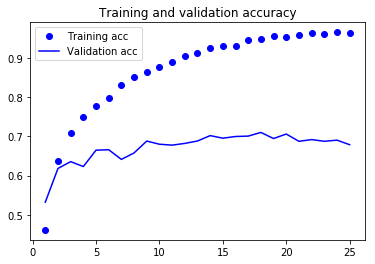

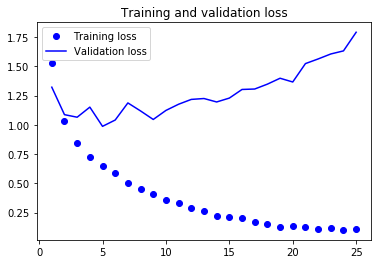

In [227]:
import matplotlib.pyplot as plt
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [228]:
score = model.evaluate(x_train, y_train, verbose=0)

# Print test accuracy
print('\n', 'Valid accuracy:', score[1])


 Valid accuracy: 0.904325


In [229]:
score = model.evaluate(x_val, y_val, verbose=0)

# Print test accuracy
print('\n', 'Valid accuracy:', score[1])


 Valid accuracy: 0.6788


In [256]:
#Performing Drop-out
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Activation('softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_42 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
batch_normalization_43 (Batc (None, 10, 10, 64)        256       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 3, 3, 128)       

In [0]:
#Performing Data Augmentation
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
#datagen.fit(x_train)
 


In [0]:
#Compile it again
model.compile(
    optimizer=tf.train.AdamOptimizer(learning_rate=1e-3, ),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['sparse_categorical_accuracy']
)

In [258]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
datagen.fit(x_train)
batch_size=128
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2, verbose=1)
history=model.fit_generator(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=100,
    steps_per_epoch=int(np.ceil(x_train.shape[0] / batch_size)),
    validation_data=(x_val, y_val),callbacks=[early_stop]
)

Epoch 1/100
313/313 [==============================] - 30s 95ms/step - loss: 2.0616 - sparse_categorical_accuracy: 0.2505 - val_loss: 1.7597 - val_sparse_categorical_accuracy: 0.3508
Epoch 2/100
313/313 [==============================] - 26s 83ms/step - loss: 1.6985 - sparse_categorical_accuracy: 0.3917 - val_loss: 1.4293 - val_sparse_categorical_accuracy: 0.4841
Epoch 3/100
313/313 [==============================] - 27s 85ms/step - loss: 1.5651 - sparse_categorical_accuracy: 0.4438 - val_loss: 1.4554 - val_sparse_categorical_accuracy: 0.4823
Epoch 4/100
313/313 [==============================] - 27s 85ms/step - loss: 1.4750 - sparse_categorical_accuracy: 0.4751 - val_loss: 1.3262 - val_sparse_categorical_accuracy: 0.5221
Epoch 5/100
313/313 [==============================] - 27s 86ms/step - loss: 1.4147 - sparse_categorical_accuracy: 0.4983 - val_loss: 1.3905 - val_sparse_categorical_accuracy: 0.5130
Epoch 6/100
313/313 [==============================] - 27s 85ms/step - loss: 1.3673 -

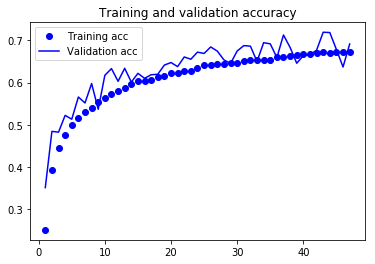

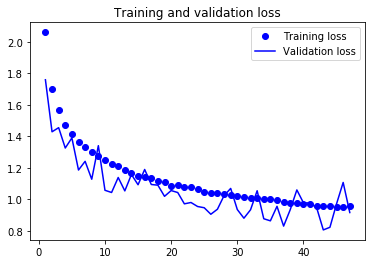

In [259]:
import matplotlib.pyplot as plt
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [260]:
score = model.evaluate(x_train, y_train, verbose=0)

# Print test accuracy
print('\n', 'Valid accuracy:', score[1])


 Valid accuracy: 0.704675


In [261]:
score = model.evaluate(x_val, y_val, verbose=0)

# Print test accuracy
print('\n', 'Valid accuracy:', score[1])


 Valid accuracy: 0.6913


In [262]:
scores = model.evaluate(x_test, y_test, verbose=0)
#print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test accuracy: 0.6892


In [0]:
idxs = np.random.randint(x_test.shape[0], size=25)
images = x_test[idxs]
true_labels = y_test[idxs]

preds = np.argmax(model.predict(images), axis=1)

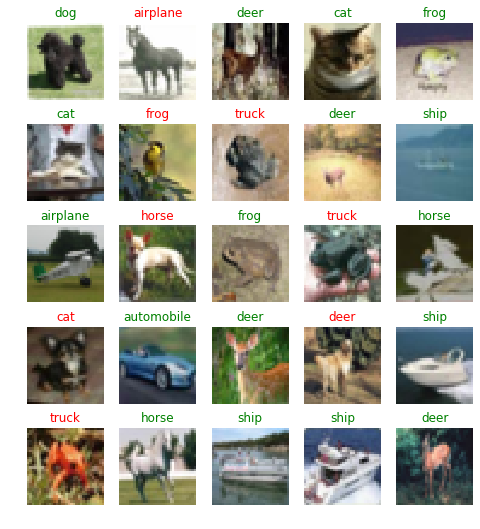

In [264]:
#Here we are trying to generate results of sime of the plots from the test set
fig, axes = plt.subplots(5,5, figsize=(8,9))
for i, ax in enumerate(axes.flat):
  ax.imshow(images[i])
  ax.axis('off')
  idx = preds[i]
  color = 'g' if idx == true_labels[i] else 'r'
  ax.set_title(classnames[idx], color=color)
#Plotting the results
plt.show()